In [299]:
# Activate environment in current folder
using Pkg
Pkg.activate(pwd())

using Plots, DelimitedFiles, ColorSchemes, Measures, LaTeXStrings, Statistics, Interpolations, Peaks, Waveforms, DSP
pyplot()

  Activating project at `~/Desktop/School Stuff/Winter 2024/Research/2024-frequency-memory`


Plots.PyPlotBackend()

In [300]:


function palette_from_hex(hex_list)
    # Function that returns a Julia color palette based on a list of hex codes
    hash_list = [string("#", i) for i in hex_list]
    
    pal = []
    for i in hash_list
        push!(pal, parse(Colorant, i))
    end
    return palette(pal)
end

# Define color palette with hexcodes
custom_palette = palette_from_hex(["009afa","e36f47","3ea44d","c371d2","ac8e18", "03aaae","ed5e93","c68225","03a98d","8e971d", "03a9cc","9b7fe9","618df6","f06073","dd65b6", "6c9f33","f61067","f7aef8","72ddf7","5e239d", "80ff72","00afb9","685044","fed9b7","f07167"])

default(
    linewidth = 2, 
    label = nothing,
    grid = false,
    thickness_scaling=2,
    markerstrokewidth=1, 
    markersize = 8,
    #formatter=(_...) -> "",
    formatter = :plain,
    background = RGBA{Float64}(1.0,1.0,1.0,0.0),
    fontfamily = "cm",
    palette = custom_palette
)

# Define color gradient for poincarre maps
time_grad = cgrad([:turquoise, :navyblue], [0.5])



scalefontsizes()
scalefontsizes(1.8)

z_factor = 4;

In [301]:
custom_palette

# Fig 2

## A)

findfont: Font family 'cm' not found.
findfont: Font family 'cm' not found.
findfont: Font family 'cm' not found.


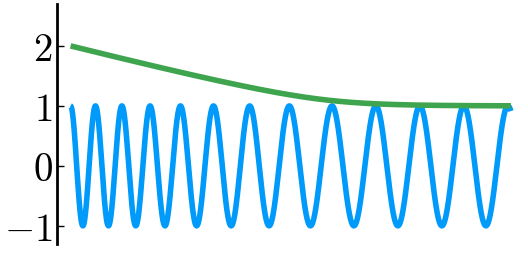

In [302]:
data = readdlm("data/fig2_a_top.csv")
default(
    size = (132, 64) .* z_factor
)
xbuff = 0.3
plot()
plot!(data[:, 1], (data[:, 2]), label = L"\cos(\phi_1)", lc = 1)
plot!(data[:, 1], (data[:, 3]), label = L"x", lc = 3)
plot!(xticks = false, xaxis = false, legend = false)
#xlims!(data[1, 1]-xbuff, data[1, end]+xbuff)
ylims!(-1.3, 2.7)


savefig("figures/fig2_a_1.svg")
plot!()

findfont: Font family 'cm' not found.
findfont: Font family 'cm' not found.


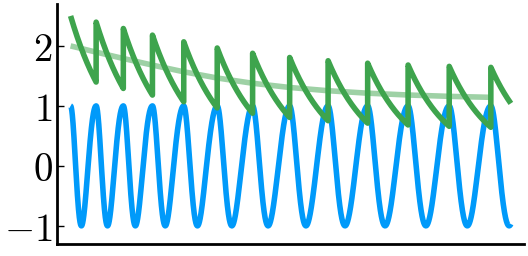

In [303]:
# Convergence Pulse
data = readdlm("data/fig2_a_bot.csv")
plot()
plot!(data[:, 1], (data[:, 2]), label = L"\cos(\phi_1)", lc = 1)
plot!(data[:, 1], (data[:, 3]), label = L"x", lc = 3)
#plot!(data1[1], (data1[3]), lc = 3, linestyle = :dot, alpha = 0.5)
plot!(vcat(0, data[:, 1][findmaxima(data[:, 3])[1]]), vcat(data[1, 3], findmaxima(data[:, 3])[2]) .- 0.5, lc = 3, linewidth = 2, linestyle = :solid, alpha = 0.5)
plot!(xticks = false, yticks = true, legend = false)
#plot!(axis = false)

ylims!(-1.3, 2.7)
savefig("figures/fig2_a_2.svg")
plot!()

## B)

findfont: Font family 'cm' not found.
findfont: Font family 'cm' not found.
findfont: Font family 'cm' not found.


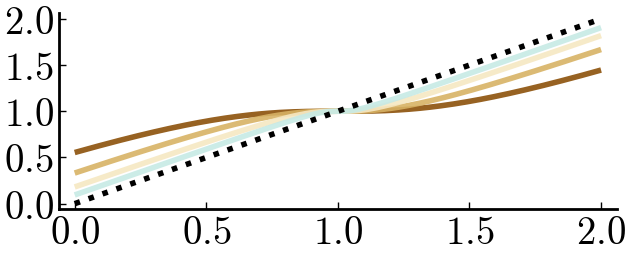

In [304]:
# Coupling curves
data_list = [
    #readdlm("data/fig2_b_top_-1.csv"),
    #readdlm("data/fig2_b_top_0.csv"),
    readdlm("data/fig2_b_top_1.csv"),
    readdlm("data/fig2_b_top_2.csv"),
    readdlm("data/fig2_b_top_3.csv"),
    readdlm("data/fig2_b_top_4.csv")
]

default(
    #aspect_ratio = 1,
    size = (158, 64) .* z_factor
)
plot(
    palette = :BrBG_6
)
lc = 1

for data in data_list
    plot!(data[:, 1], data[:, 2], alpha = 0.9, lc = lc)
    lc += 1
end
plot!(xticks = 0:0.5:2, yticks = 0:0.5:2, legend = false)
plot!(x->x, lc = :black, linestyle = :dot)
savefig("figures/fig2_b.svg")
plot!()

findfont: Font family 'cm' not found.
findfont: Font family 'cm' not found.


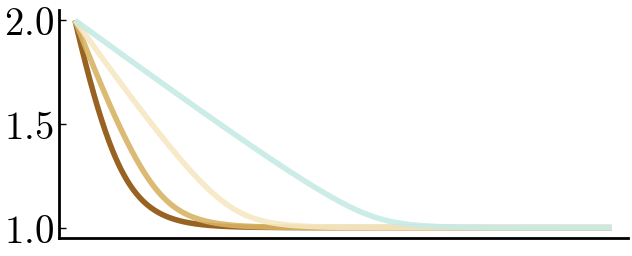

In [305]:
# Coupling curves
data_list = [
    #readdlm("data/fig2_b_bot_-1.csv"),
    #readdlm("data/fig2_b_bot_0.csv"),
    readdlm("data/fig2_b_bot_1.csv"),
    readdlm("data/fig2_b_bot_2.csv"),
    readdlm("data/fig2_b_bot_3.csv"),
    readdlm("data/fig2_b_bot_4.csv")
]

default(
    #aspect_ratio = 1,
    size = (158, 64) .* z_factor
)
plot(
    palette = :BrBG_6,
    yticks = [0, 1, 1.5, 2],
    xticks = false
)
lc = 1

for data in data_list
    plot!(data[:, 1], data[:, 2], alpha = 0.9)
    lc += 1
end
plot!(
    #formatter = :plain,
    legend = false)
ylims!(0.95, 2.05)
savefig("figures/fig2_b_2.svg")
plot!()

# Fig 3

## A)

In [306]:
default(
    size = (290, 180) .* z_factor
)

findfont: Font family 'cm' not found.
findfont: Font family 'cm' not found.
findfont: Font family 'cm' not found.


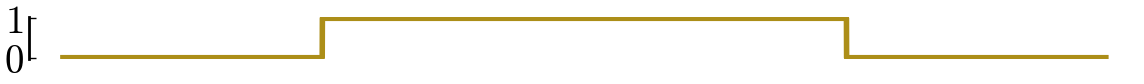

In [307]:
data = readdlm("data/fig3_a_top.csv")
plot(
    legend = nothing,
    xaxis = false,
    yticks = [0, 1],
    size = (286, 21) .* z_factor
    )

plot!(data[:, 1], data[:, 2], lc = 5)
savefig("figures/fig3_a_1.svg")
plot!()


findfont: Font family 'cm' not found.
findfont: Font family 'cm' not found.
findfont: Font family 'cm' not found.


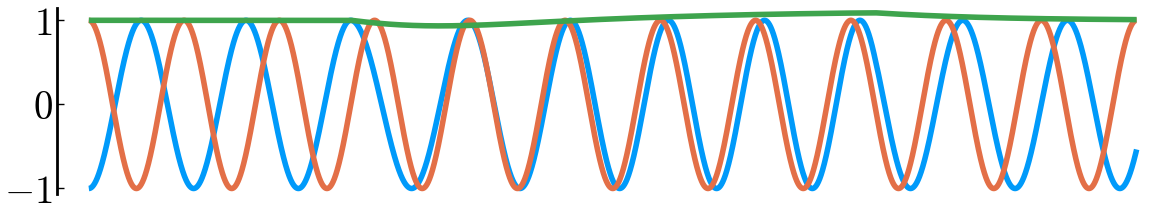

In [308]:
data = readdlm("data/fig3_a_mid.csv")
tt = data[:, 1]
ϕt = data[:, 2]
θt = data[:, 3]
xt = data[:, 4]

default(
    size = (293, 54) .* z_factor,
)
plt2 = plot(
    legend = nothing,
    yticks = [-1, 0., 1.],
    xaxis = false,
    )


plot!(plt2, tt, ϕt, label = L"\cos \phi", lc = 1,)
plot!(plt2, tt, θt, label = L"\cos \theta", lc = 2);
plot!(plt2, tt, xt, label = L"x", lc = 3)
savefig("figures/fig3_a_2.svg")
plot!()

findfont: Font family 'cm' not found.
findfont: Font family 'cm' not found.
findfont: Font family 'cm' not found.


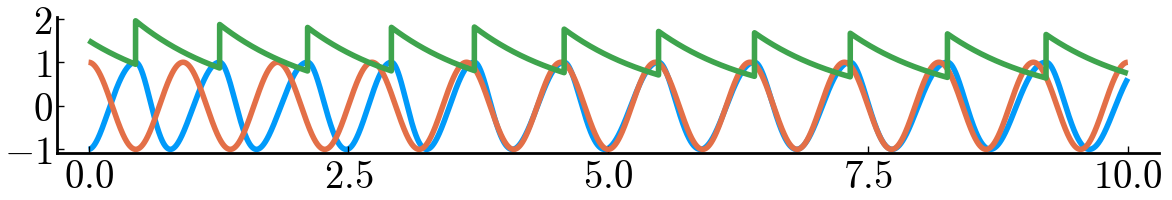

In [309]:
data = readdlm("data/fig3_a_bot.csv")
tt = data[:, 1]
ϕt = data[:, 2]
θt = data[:, 3]
xt = data[:, 4]

default(
    size = (293, 50) .* z_factor,
)
plt2 = plot(
    legend = nothing,
    yticks = [-1, 0, 1, 2],
    )


plot!(plt2, tt, ϕt, label = L"\cos \phi", lc = 1,)
plot!(plt2, tt, θt, label = L"\cos \theta", lc = 2);
plot!(plt2, tt, xt, label = L"x", lc = 3)
savefig("figures/fig3_a_3.svg")
plot!()

## B)

In [310]:
default(
    size = (290, 180) .* z_factor
)

findfont: Font family 'cm' not found.
findfont: Font family 'cm' not found.
findfont: Font family 'cm' not found.


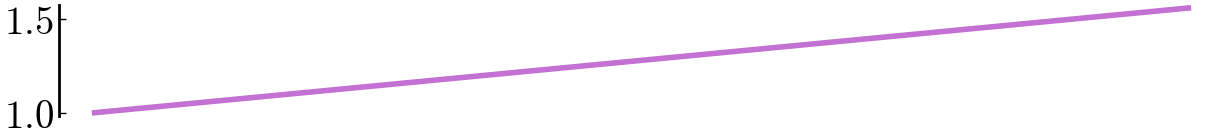

In [311]:
data1 = readdlm("data/fig3_b_top.csv")
default(size = (307, 35) .* z_factor)
plot(
    legend = nothing,
    xaxis = false,
    yticks = [1, 1.5],
    #ylims = (0.95, 1.55)
    #size = (300, 15) .* z_factor
    )


plot!(data1[:, 1], (data1[:, 2]), lc = 4)


savefig("figures/fig3_b_1.svg")
plot!()

findfont: Font family 'cm' not found.
findfont: Font family 'cm' not found.
findfont: Font family 'cm' not found.


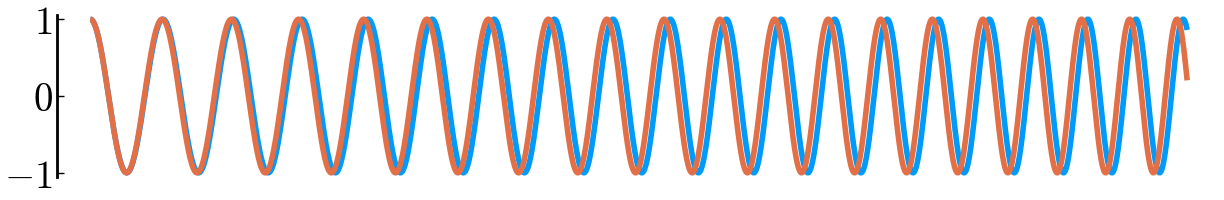

In [312]:
data = readdlm("data/fig3_b_mid.csv")
default(size = (306, 50) .* z_factor)
plot(
    legend = nothing,
    xaxis = false,
    yticks = [-1, 0, 1],
    #ylims = (-1.3, 1.3)
    #size = (300, 15) .* z_factor
    )

plot!(data[:, 1], (data[:, 2]), lc = 1)
plot!(data[:, 1], (data[:, 3]), lc = 2)
#plot!(data1[1], (data1[4]), lc = 3)


savefig("figures/fig3_b_2.svg")
plot!()

findfont: Font family 'cm' not found.
findfont: Font family 'cm' not found.


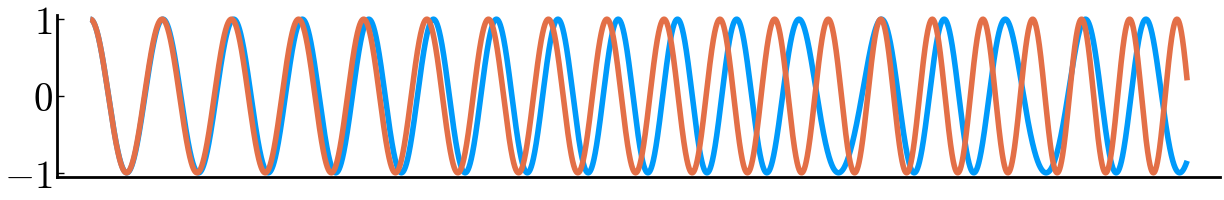

In [313]:
data = readdlm("data/fig3_b_bot.csv")

plot(
    legend = nothing,
    #xaxis = false,
    yticks = [-1, 0, 1],
    xticks = false,
    size = (306, 50) .* z_factor
    )

plot!(data[:, 1], (data[:, 2]), lc = 1)
plot!(data[:, 1], (data[:, 3]), lc = 2)



savefig("figures/fig3_b_3.svg")
plot!()

# Fig 4

## A)

sys:1: UserWarning: No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored
findfont: Font family 'cm' not found.
findfont: Font family 'cm' not found.
sys:1: UserWarning: No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored
findfont: Font family 'cm' not found.
sys:1: UserWarning: No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored
sys:1: UserWarning: No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored
sys:1: UserWarning: No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


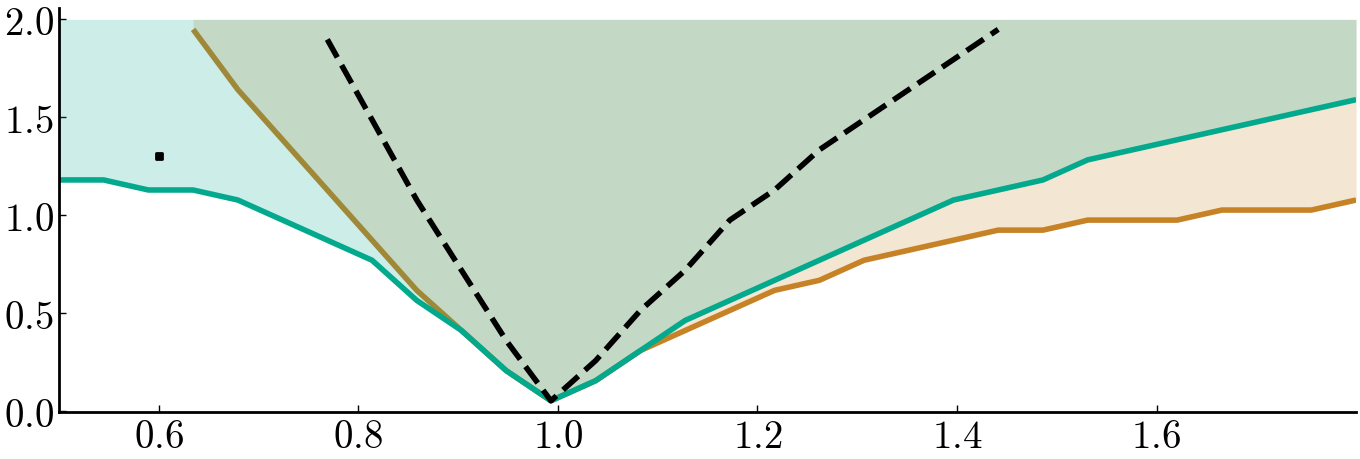

In [314]:
data = readdlm("data/fig4_a_bot.csv")

plot(
    size = (340, 115) .* z_factor,
    legend = nothing,
    #yticks = false,
    xlims = (0.5, 1.8),
    xticks = [0.6, 0.8, 1.0, 1.2, 1.4, 1.6],
    #formatter = :plain
)
plot!(data[:, 1], data[:, 2], fillrange = 2, fillcolor = 8, fillalpha = 0.2, lc = 8)
plot!(data[:, 1], data[:, 3], fillrange = 2, fillcolor = 9, fillalpha = 0.2, lc = 9)
plot!(data[:, 1], data[:, 4], lc = :black, linestyle = :dash)
scatter!([0.6], [1.3], markershape = :square, mc = :black, label = "A",  markersize = 2)
savefig("figures/fig4_a_bot.svg")
plot!()

### B1

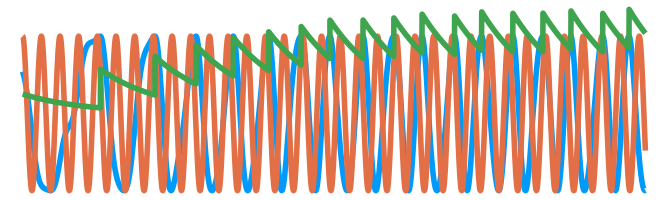

In [315]:
data = readdlm("data/fig4_a_top_l.csv")
tt = data[:, 1]
phi = data[:, 2]
theta = data[:, 3]
xt = data[:, 4]
default(
    size = (167, 50) .* z_factor,
)

plot(
    ticks = false,
    xaxis = false,
    yaxis = false
    )
plot!(tt, phi, lc = 1)
plot!(tt, theta, lc = 2)
plot!(tt, xt, lc = 3)
savefig("figures/fig4_a_top_l.svg")
plot!()

### B2

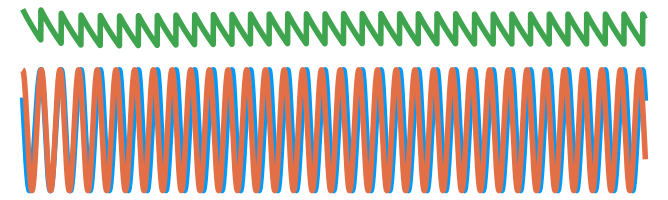

In [316]:
data = readdlm("data/fig4_a_mid_l.csv")
tt = data[:, 1]
phi = data[:, 2]
theta = data[:, 3]
xt = data[:, 4]
default(
    size = (167, 50) .* z_factor,
)

plot(
    ticks = false,
    xaxis = false,
    yaxis = false
    )
plot!(tt, phi, lc = 1)
plot!(tt, theta, lc = 2)
plot!(tt, xt, lc = 3)
savefig("figures/fig4_a_mid_l.svg")
plot!()

sys:1: UserWarning: No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored
sys:1: UserWarning: No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored
sys:1: UserWarning: No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored
sys:1: UserWarning: No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored
sys:1: UserWarning: No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


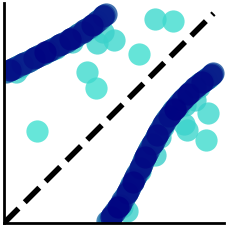

In [317]:
data = (readdlm("data/fig4_a_top_r.csv"))[1:200, :]
xp = data[:, 1]
yp = data[:, 2]

plot(
    size = (57, 57) .* z_factor,
    legend = false,
    aspect_ratio = 1.0,
    formatter=(_...) -> "",
    ticks = false,
    xlims = (0, 1.05),
    ylims = (0, 1.05)
    )
plot!(x->x, 0:1, linestyle = :dash, color = :black)
scatter!(xp, yp, zcolor = 1:length(xp), aspect_ratio = 1.0, markerstrokewidth=0, alpha = 0.8, color = time_grad)
plot!()
savefig("figures/fig4_a_top_r.svg")
plot!()

sys:1: UserWarning: No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored
sys:1: UserWarning: No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored
sys:1: UserWarning: No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored
sys:1: UserWarning: No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored
sys:1: UserWarning: No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


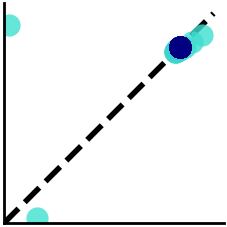

In [318]:
data = (readdlm("data/fig4_a_mid_r.csv"))[1:200, :]

xp = data[:, 1]
yp = data[:, 2]

plot(
    size = (57, 57) .* z_factor,
    legend = false,
    aspect_ratio = 1.0,
    formatter=(_...) -> "",
    ticks = false,
    xlims = (0, 1.05),
    ylims = (0, 1.05)
    )
plot!(x->x, 0:1, linestyle = :dash, color = :black)
scatter!(xp, yp, zcolor = 1:length(xp), aspect_ratio = 1.0, markerstrokewidth=0, alpha = 0.8, color = time_grad)
plot!()
savefig("figures/fig4_a_mid_r.svg")
plot!()

## B)

findfont: Font family 'cm' not found.
findfont: Font family 'cm' not found.
findfont: Font family 'cm' not found.


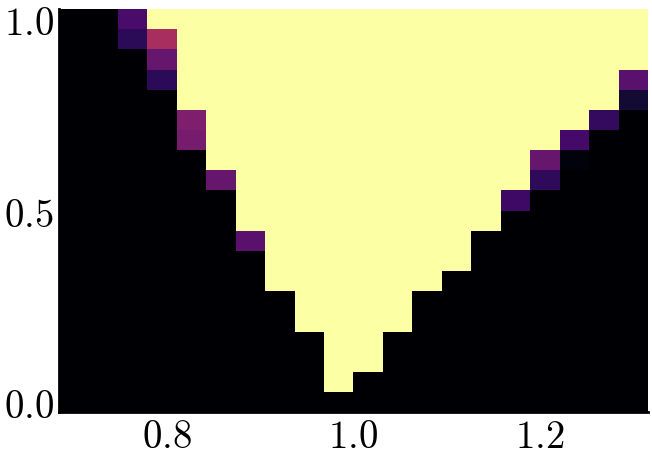

In [319]:
M = readdlm("data/fig4_b_l.csv")
data = readdlm("data/fig4_b_l_axis.csv")
xx = data[:, 1] # Range of periods
yy = data[:, 2]   # Range of Amplitudes

plot(
    #palette = :Set2_4,
    size = (163, 115) .* z_factor,
    yticks = 0:0.5:1,
    xticks = 0.8:0.2:1.2,
    #clims=(-π/4-0.1,π/4+0.1),
    colorbar_ticks = (0:0.5:1.0),
    legend = false
)
heatmap!(xx, yy, M)
savefig("figures/fig4_b_1.svg")
plot!()

findfont: Font family 'cm' not found.
findfont: Font family 'cm' not found.
findfont: Font family 'cm' not found.


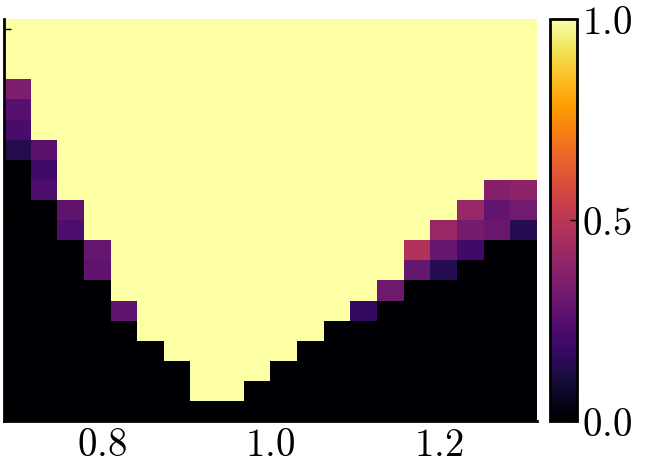

In [320]:
M = readdlm("data/fig4_b_r.csv")

plot(
    #palette = :Set2_4,
    size = (168, 117) .* z_factor,
    yticks = (0:0.5:1, ["", "", ""]),
    xticks = 0.8:0.2:1.2,
    #clims=(-π/4-0.1,π/4+0.1),
    colorbar_ticks = (0:0.5:1.0),
)
heatmap!(xx, yy,  M)
savefig("figures/fig4_b_2.svg")
plot!()

# Fig 5

## A)

findfont: Font family 'cm' not found.
findfont: Font family 'cm' not found.
findfont: Font family 'cm' not found.


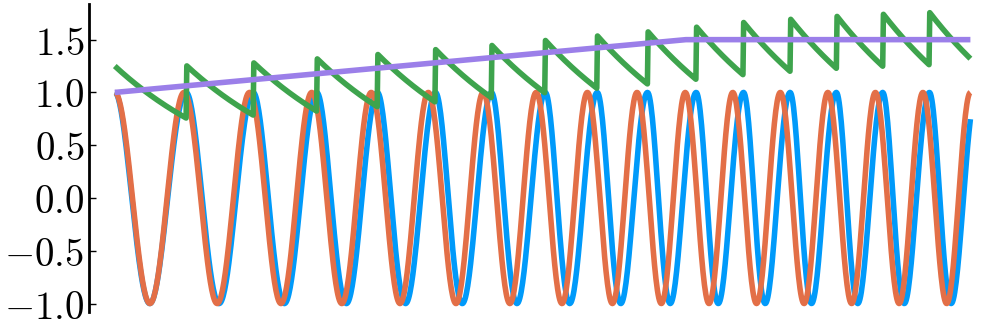

In [321]:
data = readdlm("data/fig5_a_top.csv")
tt = data[:, 1]
ϕt = data[:, 2]
θt = data[:, 3]
xt = data[:, 4]
ωt = data[:, 5]

plot(size = (250, 83).* z_factor)
plot!(tt, ϕt, label = L"\cos \phi", lc = 1, xaxis = false, legend = nothing, )
plot!(tt, θt, label = L"\cos \theta", lc = 2);
plot!(tt, xt, label = L"x", lc = 3)
plot!(tt, ωt, lc = 12, label = L"\omega")
savefig("figures/fig5_a_top.svg")
plot!()

sys:1: UserWarning: No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored
sys:1: UserWarning: No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored
sys:1: UserWarning: No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored
sys:1: UserWarning: No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored
sys:1: UserWarning: No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


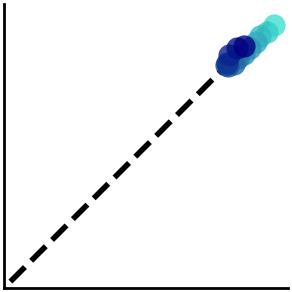

In [385]:
data = readdlm("data/fig5_a_top_poinc.csv")
xp = data[:, 1]
yp = data[:, 2]
cs = data[:, 3]

plot(
    formatter=(_...) -> "",
    size = (73, 73).*z_factor,
    ticks = false,
    legend = false,
    xlims = (-0.15, 2*π+0.15),
    ylims = (-0.15, 2*π+0.15)
)

plot!(x->x, 0:2*π, linestyle = :dash, color = :black)
scatter!(xp, yp, alpha = 0.8, zcolor = cs, color = time_grad, markerstrokewidth = 0)
savefig("figures/fig5_a_top_poinc.svg")
plot!()

findfont: Font family 'cm' not found.
findfont: Font family 'cm' not found.
findfont: Font family 'cm' not found.


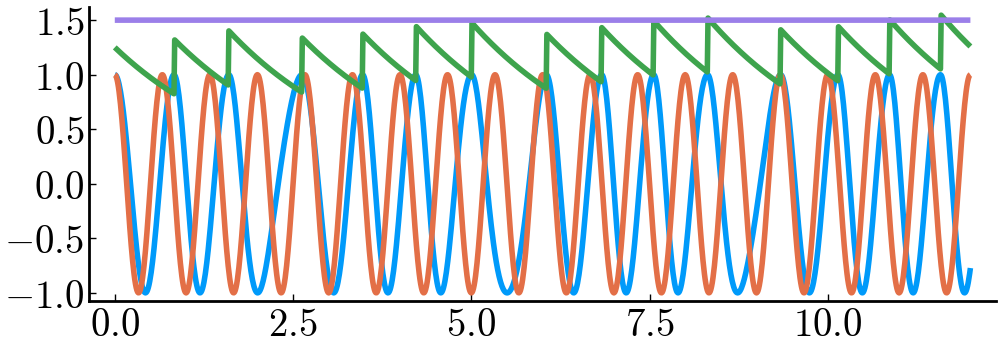

In [323]:
data = readdlm("data/fig5_a_bot.csv")
tt = data[:, 1]
ϕt = data[:, 2]
θt = data[:, 3]
xt = data[:, 4]
ωt = data[:, 5]

plot(size = (250, 87).* z_factor)
plot!(tt, ϕt, label = L"\cos \phi", lc = 1, legend = nothing, )
plot!(tt, θt, label = L"\cos \theta", lc = 2);
plot!(tt, xt, label = L"x", lc = 3)
plot!(tt, ωt, lc = 12, label = L"\omega")
savefig("figures/fig5_a_bot.svg")
plot!()


sys:1: UserWarning: No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored
sys:1: UserWarning: No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored
sys:1: UserWarning: No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored
sys:1: UserWarning: No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored
sys:1: UserWarning: No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


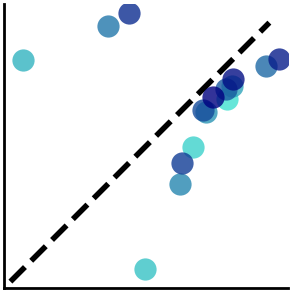

In [386]:
data = readdlm("data/fig5_a_bot_poinc.csv")
xp = data[:, 1]
yp = data[:, 2]
cs = data[:, 3]

plot(
    formatter=(_...) -> "",
    size = (73, 73).*z_factor,
    ticks = false,
    legend = false,
    xlims = (-0.15, 2*π+0.15),
    ylims = (-0.15, 2*π+0.15)
)

plot!(x->x, 0:2*π, linestyle = :dash, color = :black)
scatter!(xp, yp, alpha = 0.8, zcolor = cs, color = time_grad, markerstrokewidth = 0)
savefig("figures/fig5_a_bot_poinc.svg")
plot!()

## A)

In [325]:
default(size = (280, 49) .* z_factor)

findfont: Font family 'cm' not found.
findfont: Font family 'cm' not found.
findfont: Font family 'cm' not found.


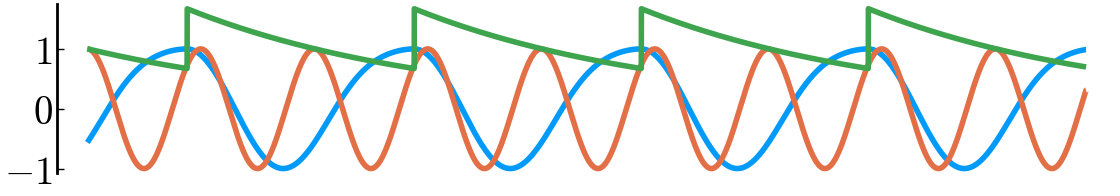

In [326]:
data = readdlm("data/fig5_b_top.csv")
tt = data[:, 1]
ϕt = data[:, 2]
θt = data[:, 3]
xt = data[:, 4]


plot(yticks = [-1, 0, 1])
plot!(tt, ϕt, label = L"\cos(\phi)", lc = 1, legend = nothing, xaxis = false)
plot!(tt, θt, label = L"\cos(\theta)", lc = 2)
plot!(tt, xt, label = L"x", lc = 3);
savefig("figures/fig5_b_top.svg")
plot!()

In [327]:
default(size = (280, 53) .* z_factor)

findfont: Font family 'cm' not found.
findfont: Font family 'cm' not found.
findfont: Font family 'cm' not found.


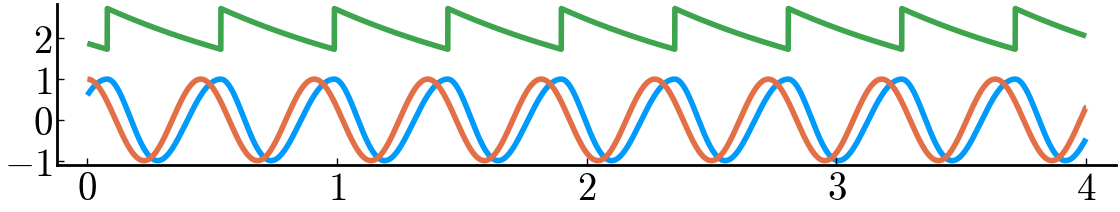

In [328]:
data = readdlm("data/fig5_b_bot.csv")
tt = data[:, 1]
ϕt = data[:, 2]
θt = data[:, 3]
xt = data[:, 4]



plot(tt, ϕt, label = L"\cos(\phi)", lc = 1, legend = nothing)
plot!(tt, θt, label = L"\cos(\theta)", lc = 2)
plot!(tt, xt, label = L"x", lc = 3);
savefig("figures/fig5_b_bot.svg")
plot!()

# Fig 6

sys:1: UserWarning: No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored
sys:1: UserWarning: You passed a edgecolor/edgecolors ((0.0, 0.0, 0.0, 1.0)) for an unfilled marker ('_').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
findfont: Font family 'cm' not found.
findfont: Font family 'cm' not found.
sys:1: UserWarning: No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored
sys:1: UserWarning: You passed a edgecolor/edgecolors ((0.0, 0.0, 0.0, 1.0)) for an unfilled marker ('_').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
findfont: Font family 'cm' not found.
sys:1: UserWarning: No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored
sys:1: UserWarning: You passed a edgecolor/edgecolors ((0.0, 0.0, 0.0, 1.0)) for an unfilled marker ('_').  Matplotlib is ignoring the edgecolor 

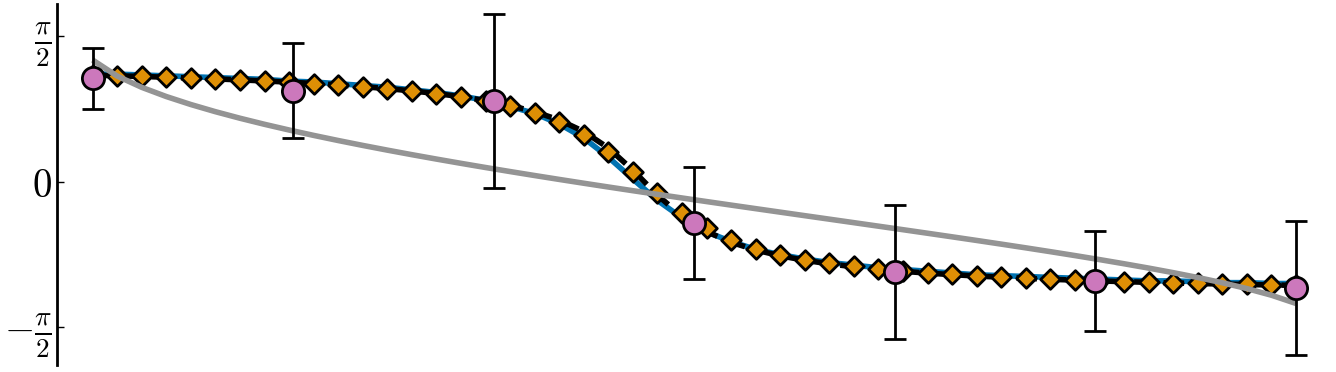

In [329]:
data1 = readdlm("data/fig6_exp.csv")
data2 = readdlm("data/fig6_theo.csv")

x_exp = data1[:, 1]
y_exp = data1[:, 2]
y_exp_d = data1[:, 3]
y_err = data1[:, 4]

pers = data2[:, 1]
p_sim = data2[:, 2]
p_sim_d = data2[:, 3]
p_app = data2[:, 4]
p_app_d = data2[:, 5]
avg_sim = data2[:, 6]
avg_sim_d = data2[:, 7]
avg_ana = data2[:, 8]
avg_ana_d = data2[:, 9]
nm = data2[:, 10]
nm_d = data2[:, 11]

default(
    size = (334, 93) .* z_factor,
)
plot(
    legend = nothing,
    yticks = ([-π/2, 0, π/2], [L"-\frac{\pi}{2}", L"0", L"\frac{\pi}{2}"]),
    grid = false,
    xaxis = false
)

period = 146.7823315025471


lw = 4


plot!(pers, p_sim, lc = 1, palette = :seaborn_colorblind) # pulsatile Simulation
#plot!(pers, avg_sim, lc = 3)     # Direct Simulation
plot!(pers, avg_ana, lc = :black, linestyle = :dash)     # Direct Analytical
scatter!(pers, p_app, mc = 2, marker = :d, markersize = 5)     # Pulsatile Approximation

plot!(pers, nm, lc = 8)     # Non adaptive
scatter!(x_exp, y_exp, yerror = y_err, color = 5, markerstrokewidth = 1)

savefig("figures/fig6_top.svg")
plot!()

sys:1: UserWarning: No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored
findfont: Font family 'cm' not found.
findfont: Font family 'cm' not found.
sys:1: UserWarning: No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored
findfont: Font family 'cm' not found.
sys:1: UserWarning: No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored
sys:1: UserWarning: No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored
sys:1: UserWarning: No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


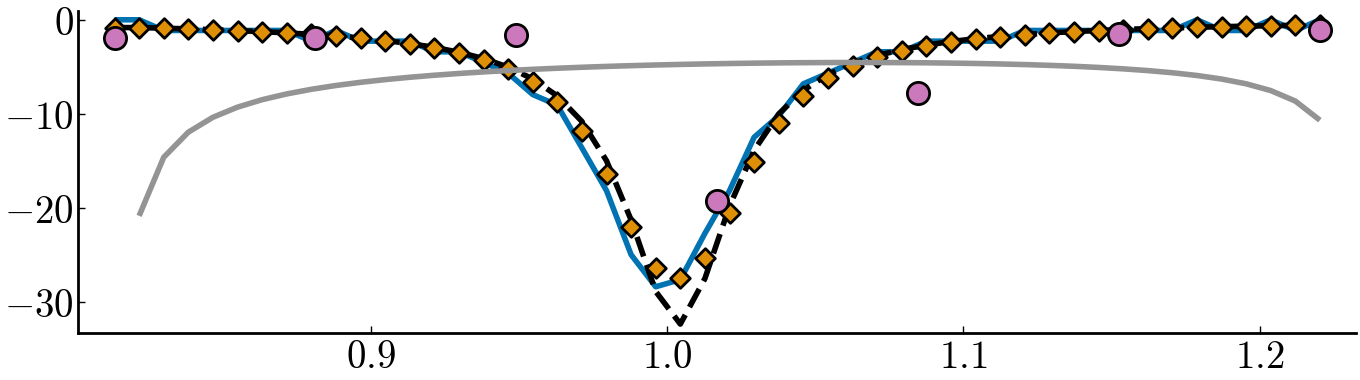

In [330]:




plot(
    legend = nothing,
    #formatter=(_...) -> "",
    #formatter = :plain,
    #yticks = [π/2, π, 3*π/2],
    grid = false,
    palette = :seaborn_colorblind,
    size = (340, 95) .* z_factor,
)

plot!(pers, p_sim_d, lc = 1, palette = :seaborn_colorblind) # pulsatile Simulation

plot!(pers, avg_sim_d, lc = :black, linestyle = :dash)     # Direct Simulation
#plot!(pers, avg_ana_d, lc = 3)     # Direct Analytical
scatter!(pers, p_app_d, mc = 2, marker = :d, markersize = 5)     # Pulsatile Approximation
plot!(pers[2:end], nm_d[2:end], lc = 8)     # Non adaptive
scatter!(x_exp, y_exp_d, color = 5, markerstrokewidth = 1)

savefig("figures/fig6_bot.svg")
plot!()


# Figure 7

## A)

findfont: Font family 'cm' not found.
findfont: Font family 'cm' not found.
findfont: Font family 'cm' not found.


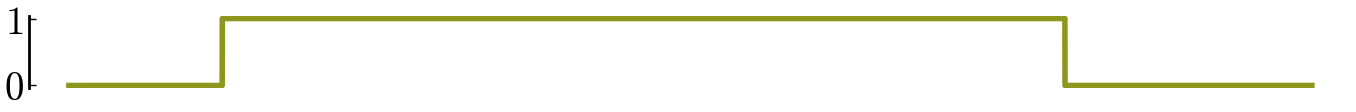

In [331]:
data = readdlm("data/fig7_a_top.csv")
plot(
    legend = nothing,
    xaxis = false,
    yticks = [0, 1],
    size = (339, 28) .* z_factor
    )

plot!(data[:, 1], data[:, 2], lc = 10)
savefig("figures/fig7_a_top.svg")
plot!()


findfont: Font family 'cm' not found.
findfont: Font family 'cm' not found.
findfont: Font family 'cm' not found.


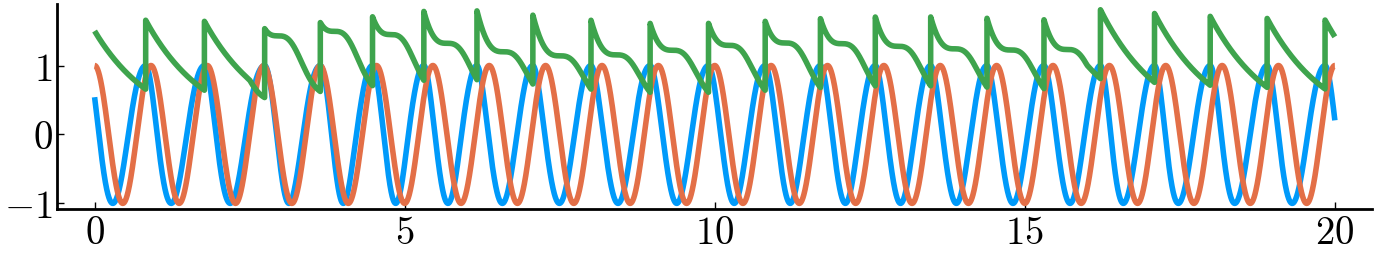

In [332]:
data = readdlm("data/fig7_a_bot.csv")
tt = data[:, 1]
phi = data[:, 2]
theta = data[:, 3]
xt = data[:, 4]

plot(
    legend = nothing,
    yticks = [-1, 0, 1, 2],
    size = (344, 64) .* z_factor
    )

plot!(tt, phi, lc = 1)
plot!(tt, theta, lc = 2)
plot!(tt, xt, lc = 3)
savefig("figures/fig7_a_bot.svg")
plot!()

## B)

In [333]:
default(
    size = (91, 64) .* z_factor
)

plot_range = 1.2
center1 = 0
center2 = -π/2
yticks1 = ([-π/6, 0, π/6], [L"-\frac{\pi}{6}", L"0", L"\frac{\pi}{6}"]);
yticks2 = ([-4*π/6, -π/2, -2*π/6], [L"-\frac{2\pi}{3}", L"-\frac{\pi}{2}", L"-\frac{\pi}{3}"])
xtic1 = [0.5, 1, 1.5]

pal = palette([:navyblue, :deepskyblue], 3)

findfont: Font family 'cm' not found.
findfont: Font family 'cm' not found.
findfont: Font family 'cm' not found.


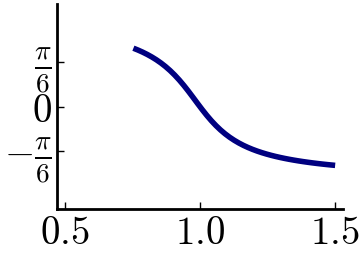

In [334]:
data = readdlm("data/fig7_b_tl.csv")

plot(
    legend = false,
    yticks = yticks1,
    ylims = [center1 - plot_range, center1 + plot_range],
    xticks = xtic1,
    #xlims = [0.79, 1.21],
    #formatter = :plain,
    #size = (315, 85) .* z_factor,
    palette = pal
)

plot!(
    data[:, 1],
    data[:, 2],
    lc = 1,
    palette = pal
)

savefig("figures/fig7_b_tl.svg")

plot!()


findfont: Font family 'cm' not found.
findfont: Font family 'cm' not found.


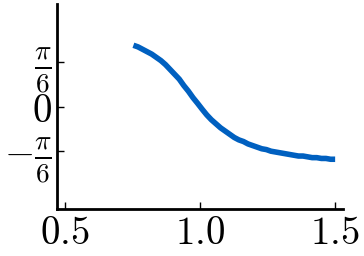

In [335]:
data = readdlm("data/fig7_b_tm.csv")

plot(
    legend = false,
    #markersize = ,
    yticks = yticks1,
    ylims = [center1 - plot_range, center1 + plot_range],
    xticks = xtic1,
    #xlims = [0.79, 1.21],
    #formatter = :plain,
    #size = (315, 85) .* z_factor,
    palette = :seaborn_colorblind
)

plot!(
    data[:, 1],
    data[:, 2],
    lc = 2,
    palette = pal
)

savefig("figures/fig7_b_tm.svg")

plot!()


findfont: Font family 'cm' not found.
findfont: Font family 'cm' not found.


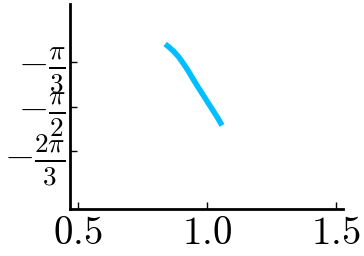

In [336]:
data = readdlm("data/fig7_b_tr.csv")

plot(
    legend = false,
    yticks = yticks2,
    ylims = [center2 - plot_range, center2 + plot_range],
    xticks = xtic1,
    #xlims = [0.79, 1.21],
    #formatter = :plain,
    #size = (315, 85) .* z_factor,
)

plot!(
    data[:, 1],
    data[:, 2],
    lc = 3,
    palette = pal
)

savefig("figures/fig7_b_tr.svg")

plot!()

findfont: Font family 'cm' not found.
findfont: Font family 'cm' not found.


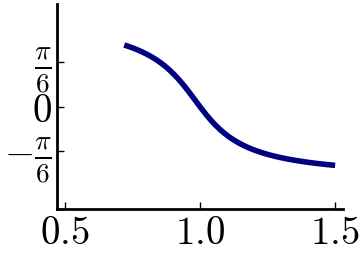

In [337]:
data = readdlm("data/fig7_b_bl.csv")

plot(
    legend = false,
    yticks = yticks1,
    ylims = [center1 - plot_range, center1 + plot_range],
    xticks = xtic1,
    #xlims = [0.79, 1.21],
    #formatter = :plain,
    #size = (315, 85) .* z_factor,
)

plot!(
    data[:, 1],
    data[:, 2],
    lc = 1,
    palette = pal
)

savefig("figures/fig7_b_bl.svg")

plot!()

findfont: Font family 'cm' not found.
findfont: Font family 'cm' not found.


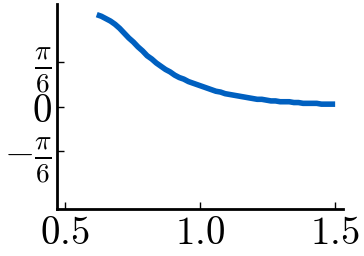

In [338]:
data = readdlm("data/fig7_b_bm.csv")

plot(
    legend = false,
    yticks = yticks1,
    ylims = [center1 - plot_range, center1 + plot_range],
    xticks = xtic1,
    #xlims = [0.79, 1.21],
    #formatter = :plain,
)

plot!(
    data[:, 1],
    data[:, 2],
    lc = 2,
    palette = pal
)

savefig("figures/fig7_b_bm.svg")

plot!()

findfont: Font family 'cm' not found.
findfont: Font family 'cm' not found.


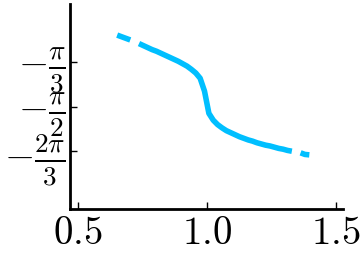

In [339]:
data = readdlm("data/fig7_b_br.csv")

plot(
    legend = false,
    yticks = yticks2,
    ylims = [center2 - plot_range, center2 + plot_range],
    xticks = xtic1,
    #xlims = [0.79, 1.21],
    #formatter = :plain,
    #size = (315, 85) .* z_factor,
)

plot!(
    data[:, 1],
    data[:, 2],
    lc = 3,
    palette = pal
)

savefig("figures/fig7_b_br.svg")

plot!()

# Fig 8

## A)

findfont: Font family 'cm' not found.
findfont: Font family 'cm' not found.
findfont: Font family 'cm' not found.


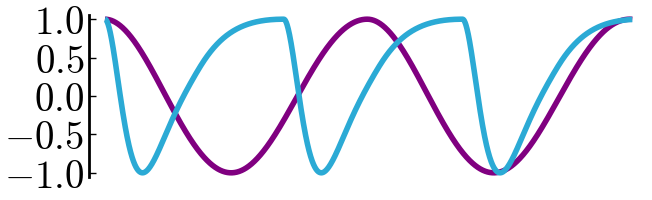

In [340]:
data1 = readdlm("data/fig8_a_0.5.csv")
data2 = readdlm("data/fig8_a_5.0.csv")

tt1 = data1[:, 1]
phi1 = data1[:, 2]
xt1 = data1[:, 3]

tt2 = data2[:, 1]
phi2 = data2[:, 2]
xt2 = data2[:, 3]

default(size = (163, 59) .* z_factor)

use_palette = palette([:purple, :cyan], 4)

plt2 = plot(size = (151, 54) .* z_factor, palette = use_palette, legend = false)
plt3 = plot(size = (163, 50) .* z_factor, palette = use_palette, legend = false, xaxis = false)

plot!(plt3, tt1, phi1, lc = 1)
plot!(plt3, tt1, phi2, lc = 3)
savefig(plt3, "figures/fig8_a_top.svg")
plot!()

findfont: Font family 'cm' not found.
findfont: Font family 'cm' not found.
findfont: Font family 'cm' not found.


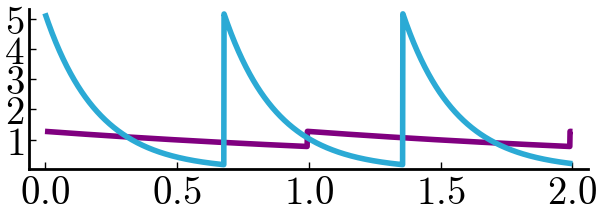

In [341]:
plot()
plot!(plt2, tt1, xt1, lc = 1)
plot!(plt2, tt1, xt2, lc = 3)
savefig(plt2, "figures/fig8_a_bot.svg")
plot!()

## B)

findfont: Font family 'cm' not found.
findfont: Font family 'cm' not found.
findfont: Font family 'cm' not found.


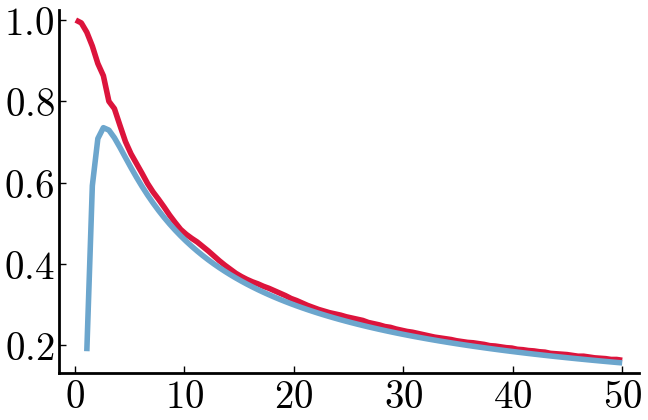

In [342]:
data = readdlm("data/fig8_b.csv")
alphas = data[:, 1]
pers = data[:, 2]
anas = data[:, 3]

plot(size = (162, 105) .* z_factor)
plot!(alphas, pers, color = :crimson)
plot!(alphas[3:end], anas[3:end], color = :skyblue3)
savefig("figures/fig8_b.svg")
plot!()

## C)

findfont: Font family 'cm' not found.
findfont: Font family 'cm' not found.
findfont: Font family 'cm' not found.


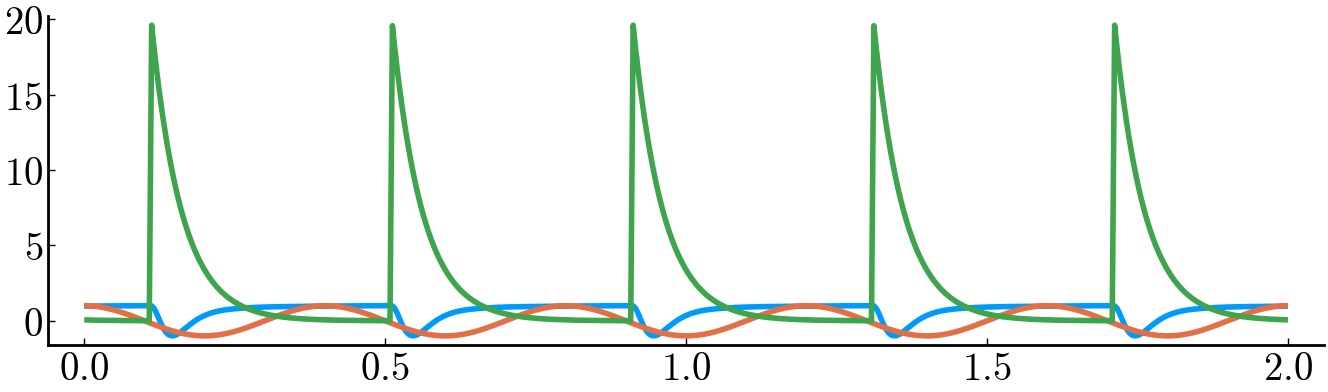

In [343]:
data = readdlm("data/fig8_c.csv")
tt = data[:, 1]
phi = data[:, 2]
theta = data[:, 3]
xt = data[:, 4]

plot(size = (332, 98) .* z_factor)
plot!(tt, phi, lc = 1)
plot!(tt, theta, lc = 2)
plot!(tt, xt, lc = 3)
savefig("figures/fig8_c.svg")
plot!()

# Fig 9

findfont: Font family 'cm' not found.
findfont: Font family 'cm' not found.
findfont: Font family 'cm' not found.


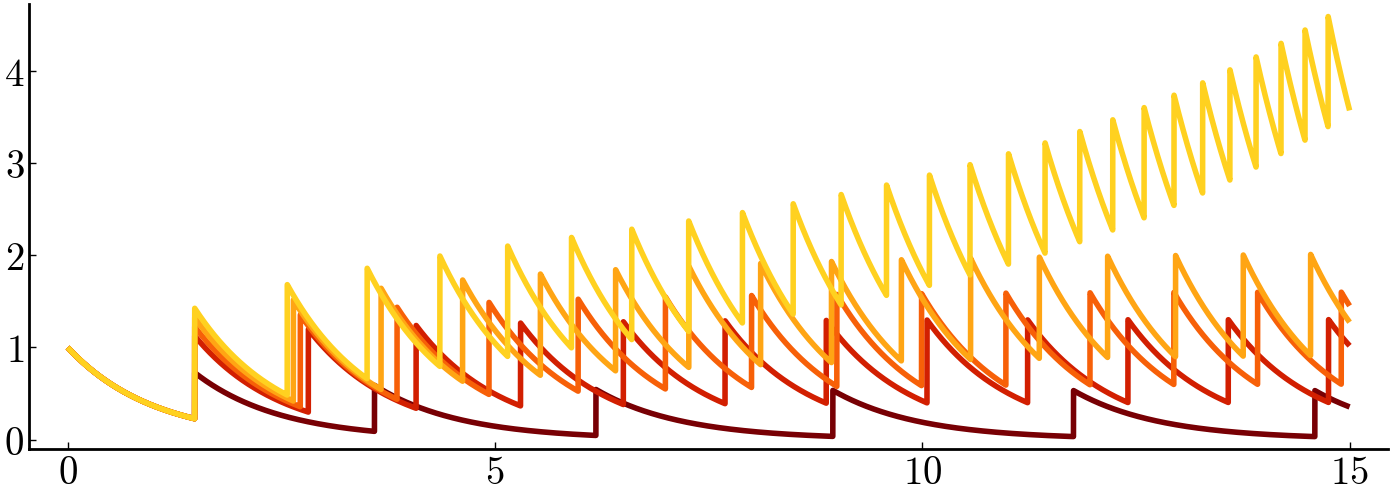

In [344]:
file_names = [
    "data/fig9_0.5.csv",
    "data/fig9_0.9.csv",
    "data/fig9_1.0.csv",
    "data/fig9_1.1.csv",
    "data/fig9_1.2.csv"
]

plot(
    size = (348, 124) .* z_factor,
    legend = nothing,
    palette = :sun,
    #formatter = :plain
)

for name in file_names
    data = readdlm(name)
    plot!(data[:, 1], data[:, 2])
end

savefig("figures/fig9.svg")
plot!()


# Fig 10

findfont: Font family 'cm' not found.
findfont: Font family 'cm' not found.
findfont: Font family 'cm' not found.


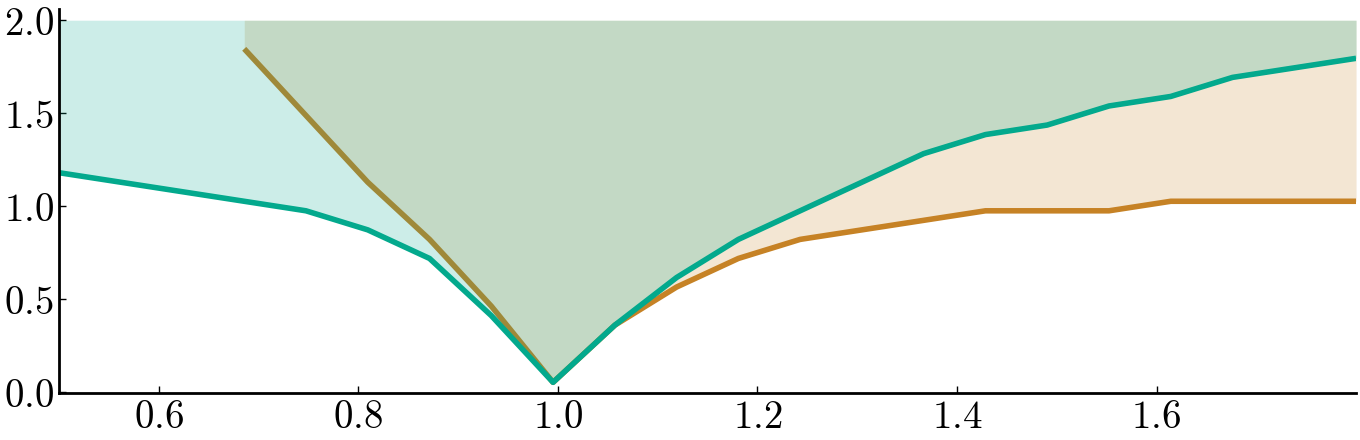

In [345]:
data = readdlm("data/fig10.csv")
pers = data[:, 1]
y1 = data[:, 2]
y2 = data[:, 3]


plot(
    size = (340, 110) .* z_factor,
    legend = nothing,
    #yticks = false,
    xlims = (0.5, 1.8),
    xticks = [0.6, 0.8, 1.0, 1.2, 1.4, 1.6],
    #formatter = :plain
)
plot!(pers, y1, fillrange = 2, fillcolor = 8, fillalpha = 0.2, lc = 8)
plot!(pers, y2, fillrange = 2, fillcolor = 9, fillalpha = 0.2, lc = 9)
savefig("figures/fig10.svg")
plot!()

# Fig 11

findfont: Font family 'cm' not found.
findfont: Font family 'cm' not found.
findfont: Font family 'cm' not found.


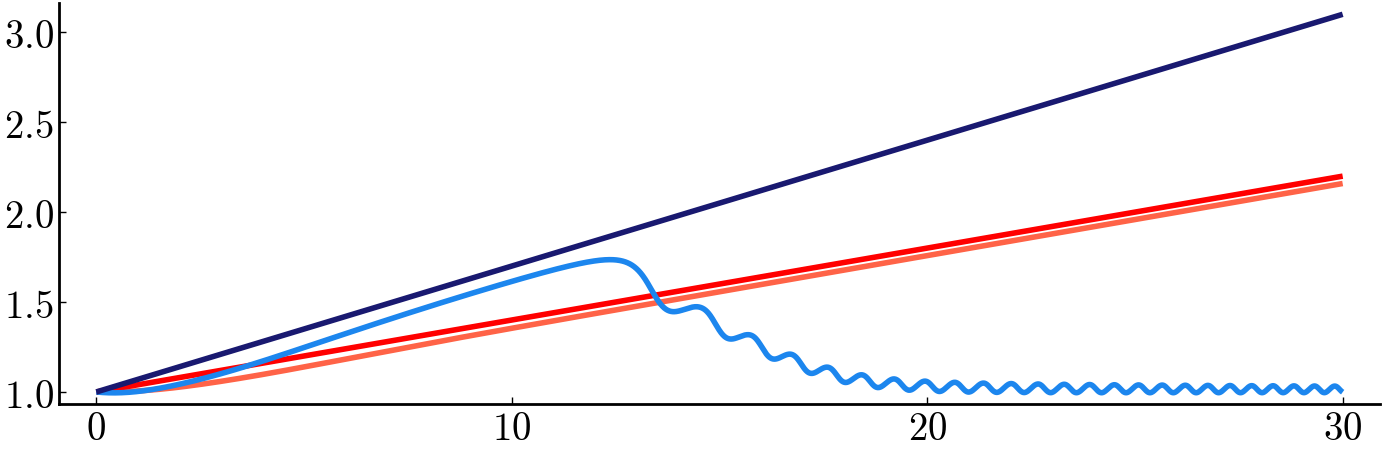

In [346]:
# ramping

data = readdlm("data/fig11.csv")
tt = data[:, 1]
x1 = data[:, 2]
x2 = data[:, 3]
omega1 = data[:, 4]
omega2 = data[:, 5]

plot(size = (346, 113) .* z_factor)
plot!(tt, x1, color = :tomato)
plot!(tt, omega1, color = :red)
plot!(tt, x2, color = :dodgerblue2)
plot!(tt, omega2, color = :midnightblue)
savefig("figures/fig11.svg")
plot!()

# Fig 12

## A

findfont: Font family 'cm' not found.
findfont: Font family 'cm' not found.
findfont: Font family 'cm' not found.


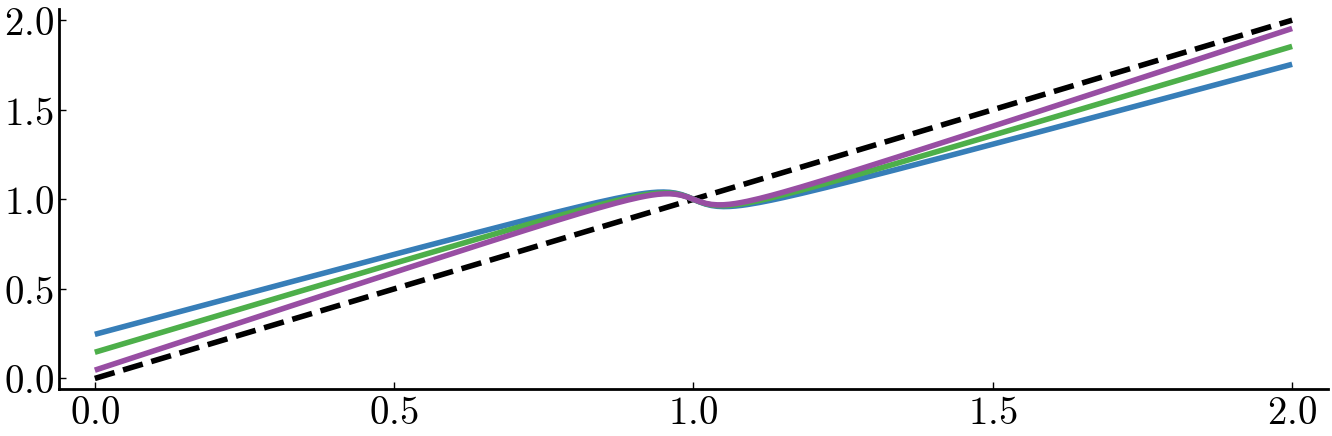

In [347]:
data1 = readdlm("data/fig12_coup_0.9.csv")
data2 = readdlm("data/fig12_coup_1.0.csv")
data3 = readdlm("data/fig12_coup_1.1.csv")

plot(
    size = (333, 109) .* z_factor,
    legend = nothing,
    palette = :Set1,
    #formatter = :plain
)

plot!(x->x, data1[:, 1], linestyle = :dash, color = :black)
plot!(data1[:, 1], data1[:, 2])
plot!(data2[:, 1], data2[:, 2])
plot!(data3[:, 1], data3[:, 2])

savefig("figures/fig12_a.svg")
plot!()

## B 

findfont: Font family 'cm' not found.
findfont: Font family 'cm' not found.
findfont: Font family 'cm' not found.


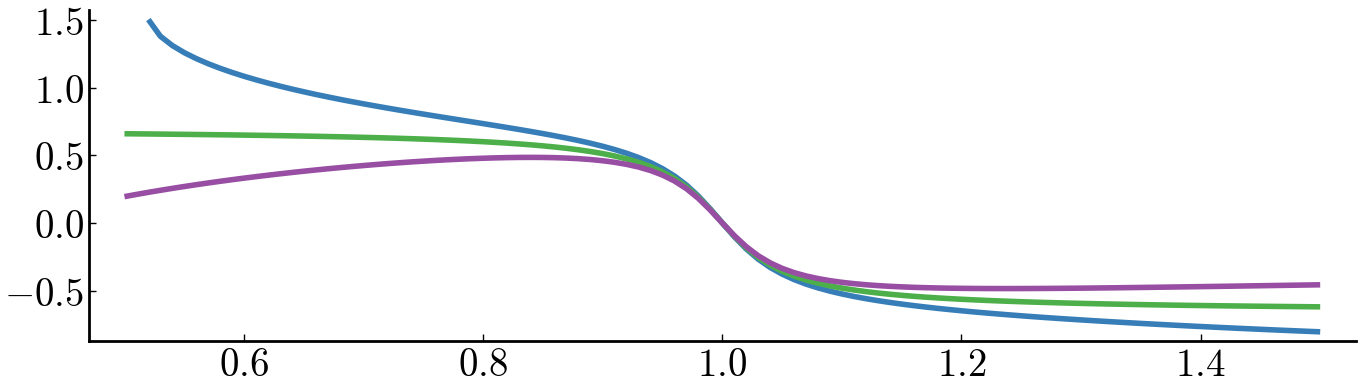

In [348]:
data1 = readdlm("data/fig12_phase_0.9.csv")
data2 = readdlm("data/fig12_phase_1.0.csv")
data3 = readdlm("data/fig12_phase_1.1.csv")

plot(
    size = (340, 97) .* z_factor,
    legend = nothing,
    palette = :Set1,
    #formatter = :plain,
    #yticks = [-1, 0, 1],
    #ylims = (-1.1, 1.1)
)
plot!(data1[:, 1], data1[:, 2], lc = 2)
plot!(data2[:, 1], data2[:, 2], lc = 3)
plot!(data3[:, 1], data3[:, 2], lc = 4)

 
savefig("figures/fig12_b.svg")
plot!()

# Figure 13

In [349]:
default(
    size = (91, 64) .* z_factor
)
plot_range = 1
center1 = 0
center2 = -π/2
yticks1 = ([-π/6, 0, π/6], [L"-\frac{\pi}{6}", L"0", L"\frac{\pi}{6}"]);
yticks2 = ([-4*π/6, -π/2, -2*π/6], [L"-\frac{2\pi}{3}", L"-\frac{\pi}{2}", L"-\frac{\pi}{3}"])
xtics = [0.5, 1, 1.5]
pal = palette([:deepskyblue, :peru], 3)

findfont: Font family 'cm' not found.
findfont: Font family 'cm' not found.
findfont: Font family 'cm' not found.


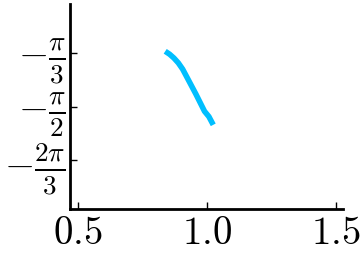

In [350]:
data = readdlm("data/fig13_tl.csv")

plot(
    legend = false,
    yticks = yticks2,
    ylims = [center2 - plot_range, center2 + plot_range],
    xticks = xtics,
    #formatter = :plain,
    #size = (315, 85) .* z_factor,
)

plot!(
    data[:, 1],
    data[:, 2],
    lc = 1,
    palette = pal
)

savefig("figures/fig13_tl.svg")

plot!()

findfont: Font family 'cm' not found.
findfont: Font family 'cm' not found.


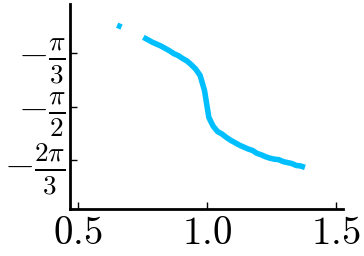

In [351]:
data = readdlm("data/fig13_bl.csv")

plot(
    legend = false,
    yticks = yticks2,
    ylims = [center2 - plot_range, center2 + plot_range],
    xticks = xtics,
    #formatter = :plain,
    #size = (315, 85) .* z_factor,
)

plot!(
    data[:, 1],
    data[:, 2],
    lc = 1,
    palette = pal
)

savefig("figures/fig13_bl.svg")

plot!()

In [352]:
yticks3 = ([5*π/6, π, 7*π/6], [L"\frac{5\pi}{6}", L"\pi", L"\frac{7\pi}{6}"])
center3 = π
xtics = [0.5, 1, 1.5]

3-element Vector{Float64}:
 0.5
 1.0
 1.5

findfont: Font family 'cm' not found.
findfont: Font family 'cm' not found.


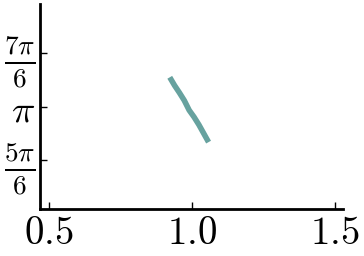

In [353]:
data = readdlm("data/fig13_tm.csv")

plot(
    legend = false,
    yticks = yticks3,
    ylims = [center3 - plot_range, center3 + plot_range],
    xticks = xtics,
    #formatter = :plain,
    #size = (315, 85) .* z_factor,
)

plot!(
    data[:, 1],
    data[:, 2],
    lc = 2,
    palette = pal
)

savefig("figures/fig13_tm.svg")

plot!()

findfont: Font family 'cm' not found.
findfont: Font family 'cm' not found.


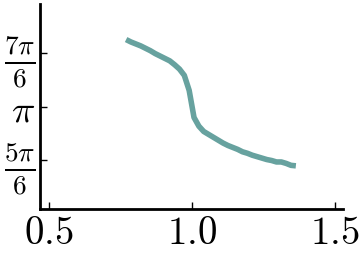

In [354]:
data = readdlm("data/fig13_bm.csv")

plot(
    legend = false,
    yticks = yticks3,
    ylims = [center3 - plot_range, center3 + plot_range],
    xticks = xtics,
    #formatter = :plain,
    #size = (315, 85) .* z_factor,
)

plot!(
    data[:, 1],
    data[:, 2],
    lc = 2,
    palette = pal
)

savefig("figures/fig13_bm.svg")

plot!()

findfont: Font family 'cm' not found.
findfont: Font family 'cm' not found.


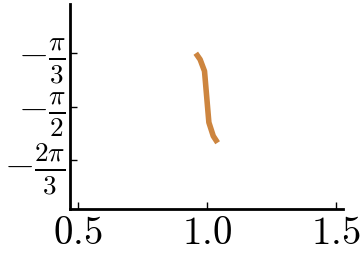

In [355]:
data = readdlm("data/fig13_tr.csv")

plot(
    legend = false,
    yticks = yticks2,
    ylims = [center2 - plot_range, center2 + plot_range],
    xticks = xtics,
    #size = (315, 85) .* z_factor,
)

plot!(
    data[:, 1],
    data[:, 2],
    lc = 3,
    palette = pal
)

savefig("figures/fig13_tr.svg")

plot!()

findfont: Font family 'cm' not found.
findfont: Font family 'cm' not found.


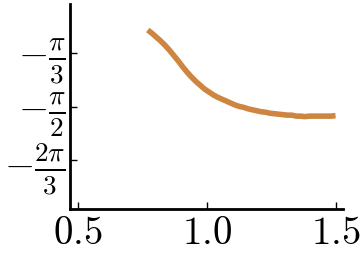

In [356]:
data = readdlm("data/fig13_br.csv")

plot(
    legend = false,
    yticks = yticks2,
    ylims = [center2 - plot_range, center2 + plot_range],
    xticks = xtics,
    #formatter = :plain,
    #size = (315, 85) .* z_factor,
)

plot!(
    data[:, 1],
    data[:, 2],
    lc = 3,
    palette = pal
)

savefig("figures/fig13_br.svg")

plot!()

# Figure 14

findfont: Font family 'cm' not found.
findfont: Font family 'cm' not found.
findfont: Font family 'cm' not found.


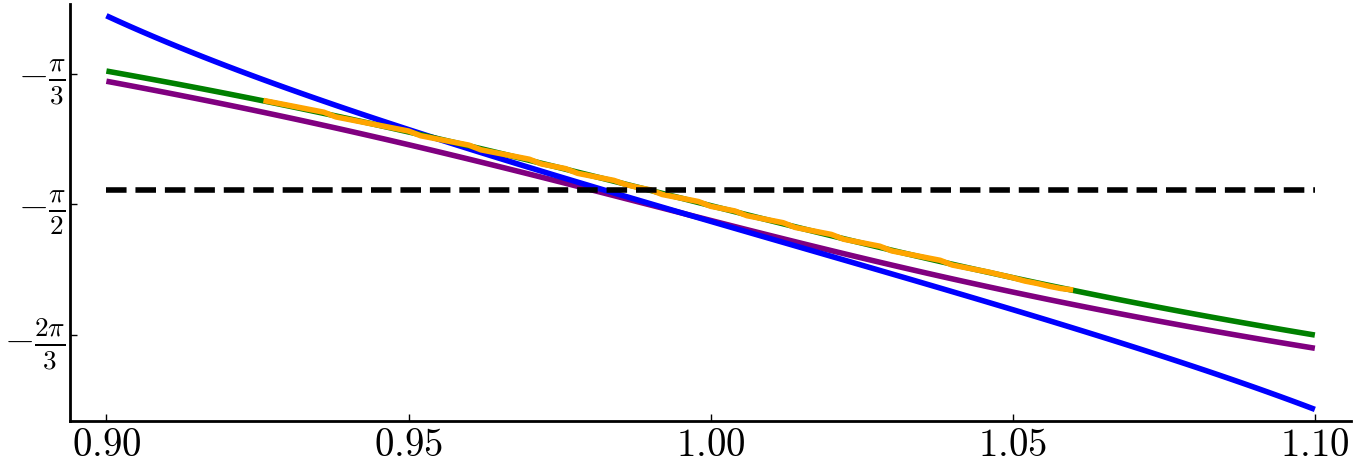

In [357]:
data = readdlm("data/fig14.csv")
x = data[:, 1]
y1 = data[:, 2]
y2 = data[:, 3]
y3 = data[:, 4]
y4 = data[:, 5]
y5 = data[:, 6]

plot(
    palette = :rainbow, 
    size = (340, 117) .* z_factor,
    legend = false,
    yticks = ([-π/3, -π/2, -2*π/3], [L"-\frac{\pi}{3}", L"-\frac{\pi}{2}", L"-\frac{2\pi}{3}"])
    )
plot!(x, y1)
plot!(x, y2)
plot!(x, y3)
plot!(x, y4)
plot!(x, y5, color = "black", linestyle = :dash)
savefig("figures/fig14.svg")
plot!()


# Figure N 1

## A)

findfont: Font family 'cm' not found.
findfont: Font family 'cm' not found.
findfont: Font family 'cm' not found.


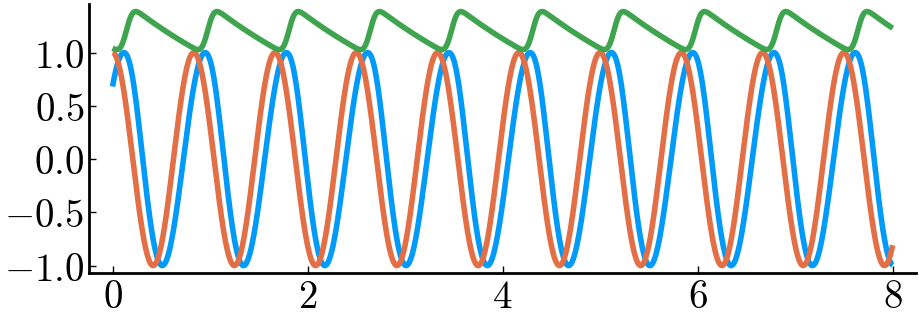

In [359]:
# import data
data1 = readdlm("data/fign1_a_1.csv")
data2 = readdlm("data/fign1_a_2.csv")

times = data1[:, 1]
phi = data1[:, 2]
theta = data1[:, 3]
x = data1[:, 4]


plot(
    size = (230, 80) .* z_factor,
    legend = false,
    )
plot!(times, phi)
plot!(times, theta)
plot!(times, x)

savefig("figures/fign1_a_1.svg")
plot!()

sys:1: UserWarning: No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored
sys:1: UserWarning: No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored
sys:1: UserWarning: No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored
sys:1: UserWarning: No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored
sys:1: UserWarning: No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


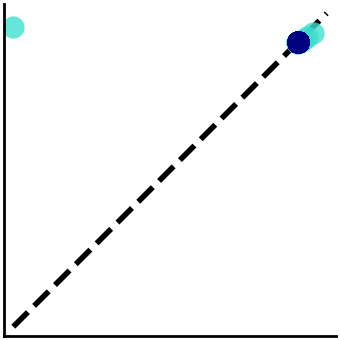

In [360]:
xp = data2[:, 1]
yp = data2[:, 2]

plot(
    size = (85, 85) .* z_factor,
    legend = false,
    aspect_ratio = 1.0,
    formatter=(_...) -> "",
    ticks = false
    )
plot!(x->x, 0:2*π, linestyle = :dash, color = :black)
scatter!(xp, yp, zcolor = 1:length(xp), aspect_ratio = 1.0, markerstrokewidth=0, alpha = 0.8, color = time_grad)

# Save figure
savefig("figures/fign1_a_2.svg")
plot!()

## B)

sys:1: UserWarning: You passed a edgecolor/edgecolors ((0.0, 0.0, 0.0, 1.0)) for an unfilled marker ('_').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
sys:1: UserWarning: No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored
findfont: Font family 'cm' not found.
findfont: Font family 'cm' not found.
sys:1: UserWarning: You passed a edgecolor/edgecolors ((0.0, 0.0, 0.0, 1.0)) for an unfilled marker ('_').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
sys:1: UserWarning: No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored
findfont: Font family 'cm' not found.
sys:1: UserWarning: You passed a edgecolor/edgecolors ((0.0, 0.0, 0.0, 1.0)) for an unfilled marker ('_').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
sys:1: UserWarning: No data for color

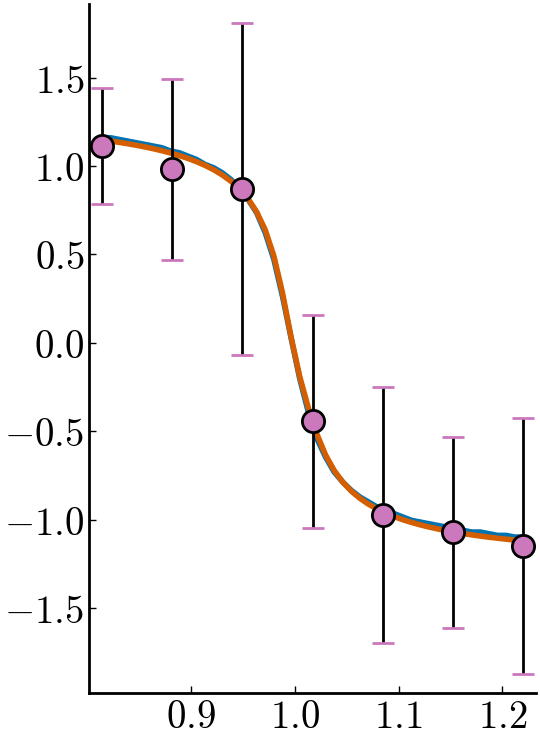

In [361]:
data1 = readdlm("data/fign1_b_1.csv")
data2 = readdlm("data/fign1_b_2.csv")

pers = data1[:, 1]
y_pulse_sim = data1[:, 2]
y_soft_pulse_sim = data1[:, 3]

pers_exp = data2[:, 1]
y_exp = data2[:, 2]
yerror = data2[:, 3]

plot(size = (135, 185).* z_factor, palette = :seaborn_colorblind)
plot!(pers, y_pulse_sim, lc = 1)
plot!(pers, y_soft_pulse_sim,lc = 4)

scatter!(pers_exp, y_exp, yerror = yerror, mc = 5, markerstrokewidth = 1)

# Save figure
savefig("figures/fign1_b.svg")
plot!()

## C)

In [362]:
default(size = (78, 32) .* z_factor,)

findfont: Font family 'cm' not found.
findfont: Font family 'cm' not found.
findfont: Font family 'cm' not found.


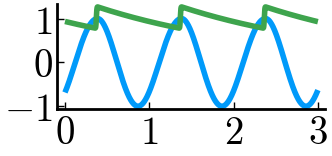

In [363]:
# import data
data1 = readdlm("data/fign1_c_top_r.csv")
data2 = readdlm("data/fign1_c_top_l.csv")

times = data1[:, 1]
phi = data1[:, 2]
x = data1[:, 3]
pulse = data1[:, 4]


plot(
    legend = false,
    yticks = [-1, 0, 1],
    size = (83, 39).*z_factor
    )
plot!(times, phi, lc = 1)
plot!(times, x, lc = 3)

# Save figure
savefig("figures/fign1_c_top_l_2.svg")
plot!()

findfont: Font family 'cm' not found.
findfont: Font family 'cm' not found.
findfont: Font family 'cm' not found.


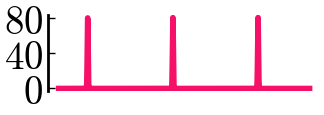

In [364]:
plot(
    xaxis = false,
    yticks = [0, 40, 80], size = (81, 29).*z_factor)
    plot!(times, pulse, lc = 17)
# Save figure
savefig("figures/fign1_c_top_l_1.svg")
plot!()

findfont: Font family 'cm' not found.
findfont: Font family 'cm' not found.
findfont: Font family 'cm' not found.


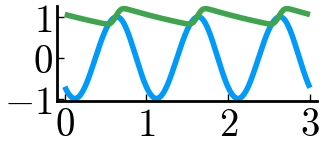

In [365]:
times = data2[:, 1]
phi = data2[:, 2]
x = data2[:, 3]
pulse = data2[:, 4]


plot(
    legend = false,
    yticks = [-1, 0, 1],
    size = (81, 37).*z_factor
    )
plot!(times, phi, lc = 1)
plot!(times, x, lc = 3)

# Save figure
savefig("figures/fign1_c_top_r_2.svg")
plot!()

findfont: Font family 'cm' not found.
findfont: Font family 'cm' not found.
findfont: Font family 'cm' not found.


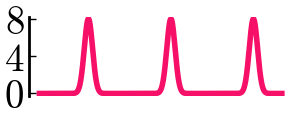

In [366]:
plot(xaxis = false, yticks = [0, 4, 8], size = (74, 30).*z_factor)
plot!(times, pulse, lc = 17)

# Save figure
savefig("figures/fign1_c_top_r_1.svg")
plot!()

findfont: Font family 'cm' not found.
findfont: Font family 'cm' not found.
findfont: Font family 'cm' not found.


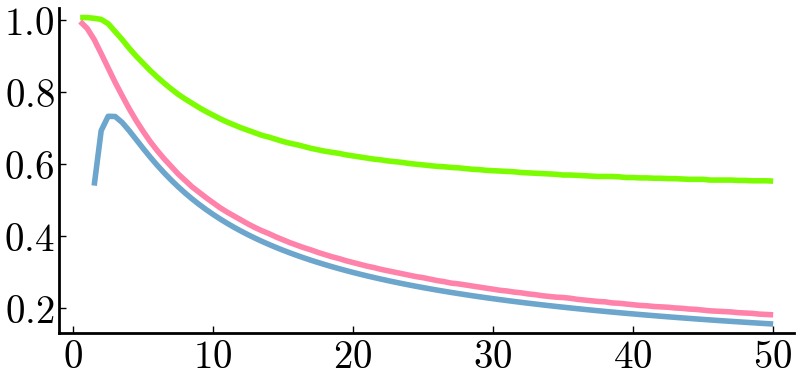

In [367]:
data = readdlm("data/fign1_c_bot.csv")
alpha_list = data[:, 1]
per_list_soft = data[:, 2]
per_list_hard = data[: , 3]
per_list_ana = data[: , 4]

plot(size = (200, 95) .* z_factor)
plot!(alpha_list, per_list_soft, color = :lawngreen)
plot!(alpha_list, per_list_hard, color = :palevioletred1)
plot!(alpha_list[3:end], per_list_ana[3:end], color =:skyblue3)

# Save figure
savefig("figures/fign1_c_bot.svg")
plot!()

## D)

In [368]:
data = readdlm("data/fign1_d.csv")
times = data[:, 1]
phi = data[:, 2]
theta = data[:, 3]
x = data[:, 4]
omegas = data[:, 5]
pulses = data[:, 6];

findfont: Font family 'cm' not found.
findfont: Font family 'cm' not found.
findfont: Font family 'cm' not found.


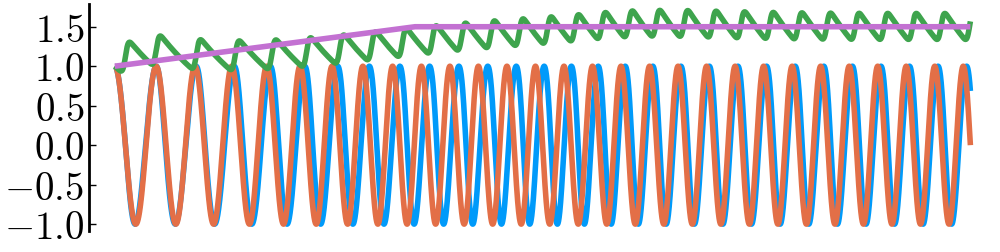

In [369]:
plot(xaxis = false, size = (250, 63) .* z_factor)
plot!(times, phi)
plot!(times, theta)
plot!(times, x)
plot!(times, omegas)

# Save figure
savefig("figures/fign1_d_1.svg")
plot!()

findfont: Font family 'cm' not found.
findfont: Font family 'cm' not found.
findfont: Font family 'cm' not found.


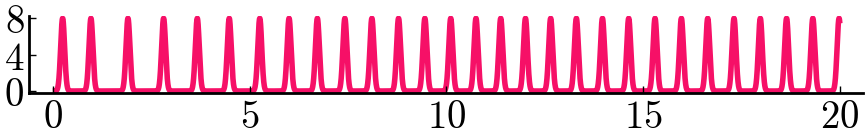

In [370]:
plot(size = (217, 35) .* z_factor, yticks = [0, 4, 8])
plot!(times, pulses, lc = 17)

# Save figure
savefig("figures/fign1_d_2.svg")
plot!()

sys:1: UserWarning: No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored
sys:1: UserWarning: No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored
sys:1: UserWarning: No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored
sys:1: UserWarning: No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored
sys:1: UserWarning: No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


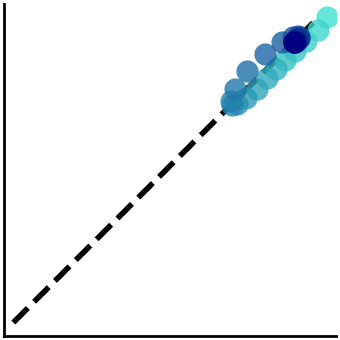

In [371]:
data = readdlm("data/fign1_d_poinc.csv")
xp = data[:, 1]
yp = data[:, 2]

plot(
    size = (85, 85) .* z_factor,
    legend = false,
    aspect_ratio = 1.0,
    formatter=(_...) -> "",
    ticks = false,
    )
plot!(x->x, 0:2*π, linestyle = :dash, color = :black)
scatter!(xp, yp, zcolor = 1:length(xp), aspect_ratio = 1.0, markerstrokewidth=0, alpha = 0.8, color = time_grad)

# Save figure
savefig("figures/fign1_d_poinc.svg")
plot!()

In [372]:
data = readdlm("data/fign1_e.csv")
times = data[:, 1]
phi = data[:, 2]
theta = data[:, 3]
x = data[:, 4]
omegas = data[:, 5]
pulses = data[:, 6];

findfont: Font family 'cm' not found.
findfont: Font family 'cm' not found.
findfont: Font family 'cm' not found.


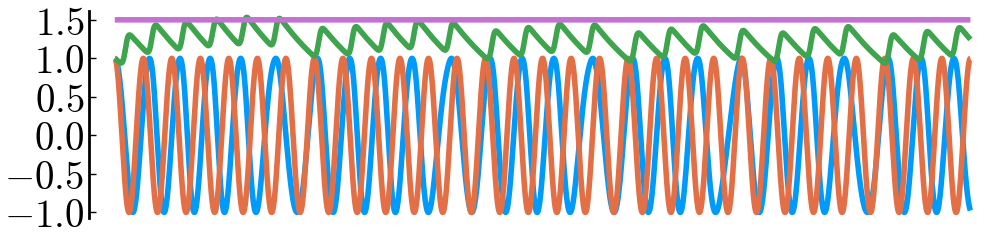

In [373]:
plot(xaxis = false, size = (250, 60) .* z_factor)
plot!(times, phi)
plot!(times, theta)
plot!(times, x)
plot!(times, omegas)

# Save figure
savefig("figures/fign1_e_1.svg")
plot!()

findfont: Font family 'cm' not found.
findfont: Font family 'cm' not found.
findfont: Font family 'cm' not found.


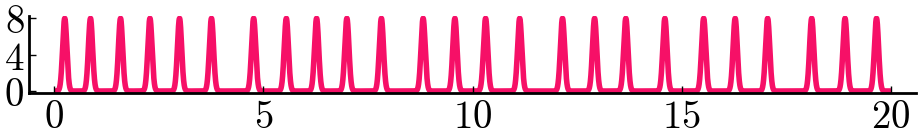

In [374]:
plot(size = (230, 35) .* z_factor, yticks = [0, 4, 8])
plot!(times, pulses, lc = 17)

# Save figure
savefig("figures/fign1_e_2.svg")
plot!()

sys:1: UserWarning: No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored
sys:1: UserWarning: No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored
sys:1: UserWarning: No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored
sys:1: UserWarning: No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored
sys:1: UserWarning: No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


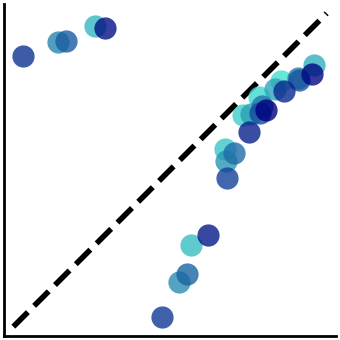

In [375]:
data = readdlm("data/fign1_e_poinc.csv")
xp = data[:, 1]
yp = data[:, 2]

plot(
    size = (85, 85) .* z_factor,
    legend = false,
    aspect_ratio = 1.0,
    formatter=(_...) -> "",
    ticks = false
    )
plot!(x->x, 0:2*π, linestyle = :dash, color = :black)
scatter!(xp, yp, zcolor = 1:length(xp), aspect_ratio = 1.0, markerstrokewidth=0, alpha = 0.8, color = time_grad)

# Save figure
savefig("figures/fign1_e_poinc.svg")
plot!()

# Figure n2 (Arnold tongue)


In [376]:
pp = palette_from_hex(["001427", "3DDC97", "8D0801"])

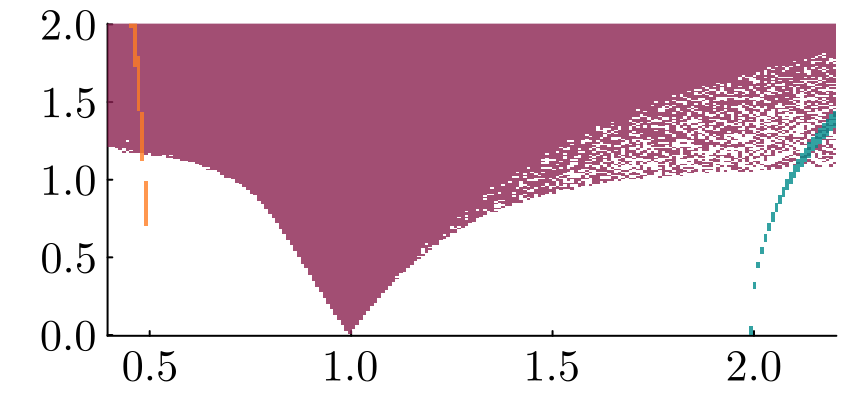

In [377]:
data11 = readdlm("tongues/tongue_11.csv")
data12 = readdlm("tongues/tongue_12.csv")*2
data21 = readdlm("tongues/tongue_21.csv")*3

gr()

pers = LinRange(0.4, 2.2, 200)
amps = LinRange(0., 2., 200)
plot(
    size = (215, 105).* z_factor,
    legend = false,
    fontfamily = "Computer Modern",
    left_margin = -5mm
    )
heatmap!(pers, amps, data11, alpha = 0.8, color = :violetred4)
heatmap!(pers, amps, data12, alpha = 0.8, color = :cyan4)
heatmap!(pers, amps, data21, alpha = 0.8, color = :chocolate1)

savefig("figures/fign2_1.png")
plot!()


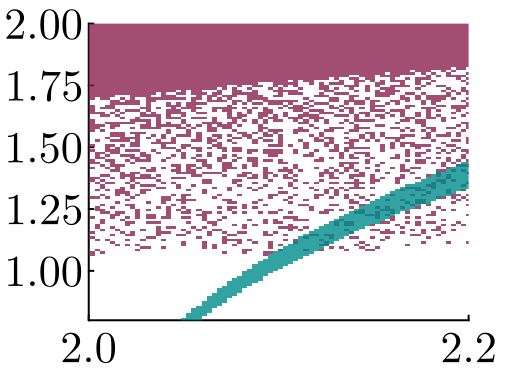

In [378]:
pp = palette_from_hex(["001427", "3DDC97"])

data11 = readdlm("tongues_zoom_1/tongue_11.csv")
data12 = readdlm("tongues_zoom_1/tongue_12.csv")*2

pers = LinRange(1.8, 2.2, 150)
amps = LinRange(0, 2, 200)
plot(
    size = (127, 95).* z_factor, 
    legend = nothing, 
    fontfamily = "Computer Modern",
    xlims = (2.0, 2.2),
    ylims = (0.8, 2.0),
    xticks = [2., 2.2],
    left_margin = -12mm,
    right_margin = 3mm,
    bottom_margin = -5mm

    )
heatmap!(pers, amps, data11, alpha = 0.8, color = :violetred4)
heatmap!(pers, amps, data12, alpha = 0.8, color = :cyan4)

savefig("figures/fign2_2.png")
plot!()

In [381]:
pyplot()

Plots.PyPlotBackend()

# Fig 3n (competition)

## b) competition phase

findfont: Font family 'cm' not found.
findfont: Font family 'cm' not found.
findfont: Font family 'cm' not found.


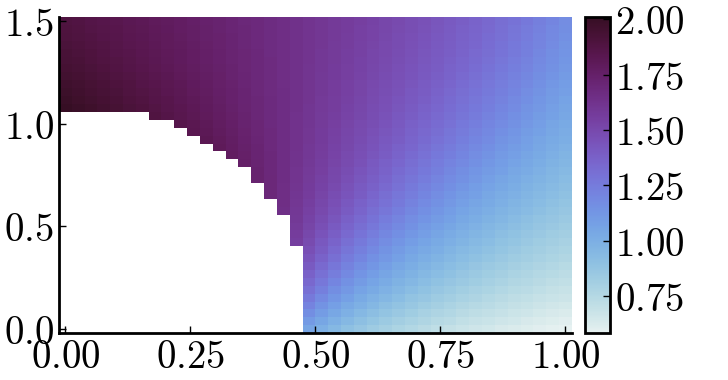

In [382]:
data = readdlm("data/fign3_b_1.csv")
axis = readdlm("data/fign3_b_axis.csv")
amps1 = axis[:, 1]
amps2 = axis[:, 2]


plt1 = plot(grid = false, size = (182, 95).*z_factor)
heatmap!(plt1, amps1, amps2, data, color = :dense)
savefig("figures/fign3_b.svg")
plot!()

## c) example competition entrainment

findfont: Font family 'cm' not found.
findfont: Font family 'cm' not found.
findfont: Font family 'cm' not found.


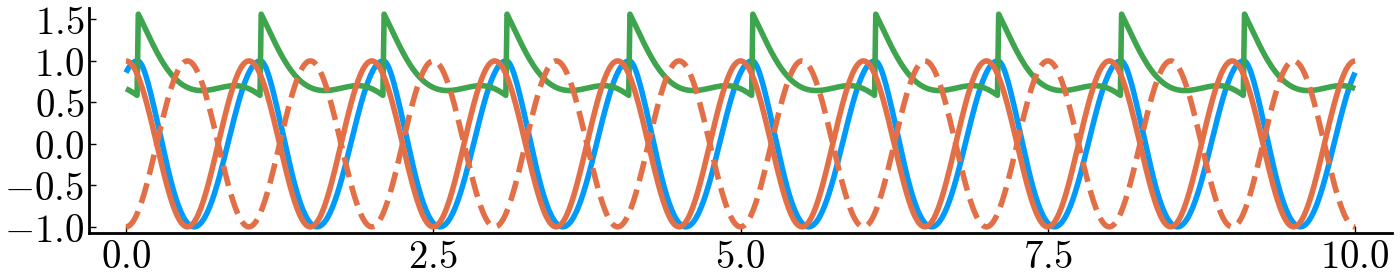

In [383]:
# Load data
data = readdlm("data/fign3_c.csv")
tt = data[:, 1]
phi = data[:, 2]
theta1 = data[:, 3]
xt = data[:, 4]
theta2 = data[:, 5]


plt = plot(size = (350, 70).* z_factor, legend = nothing)
plot!(plt, tt, phi, lc = 1)
plot!(plt, tt, xt, lc = 3)
plot!(plt, tt, theta1, lc = 2)
plot!(plt, tt, theta2, lc = 2, linestyle = :dash)
savefig("figures/fign3_c.svg")
plot!()